# EDA, FE and Regression Model (Car Dekho Dataset)
## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gfPhvjMR

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling

### 2. Linear Regression Model 
1. Linear Regression Model
2. Performance metrics for above model

### 3. Ridge, Lasso and Elastic-Net Regression Model 
1. Ridge, Lasso and Elastic-Net Regression Model
2. Performance metrics for above model

### 4. Decision Tree Regressor Model 
1. Decision Tree Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

### 5. Support Vector Regressor Model 
1. Support Vector Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

### 6. Random Forest Regressor Model 
1. Random Forest Regressor Model
2. Performance metrics for above model
3. Hyper-Parameter Tuning for above model

**Dataset:** https://github.com/Shubham3023/Machine_Learning/blob/main/Linear%20Reg%2C%20SVR%2C%20DTR%20and%20RFR%20for%20CarDekho%20dataset/cardekho_dataset.csv

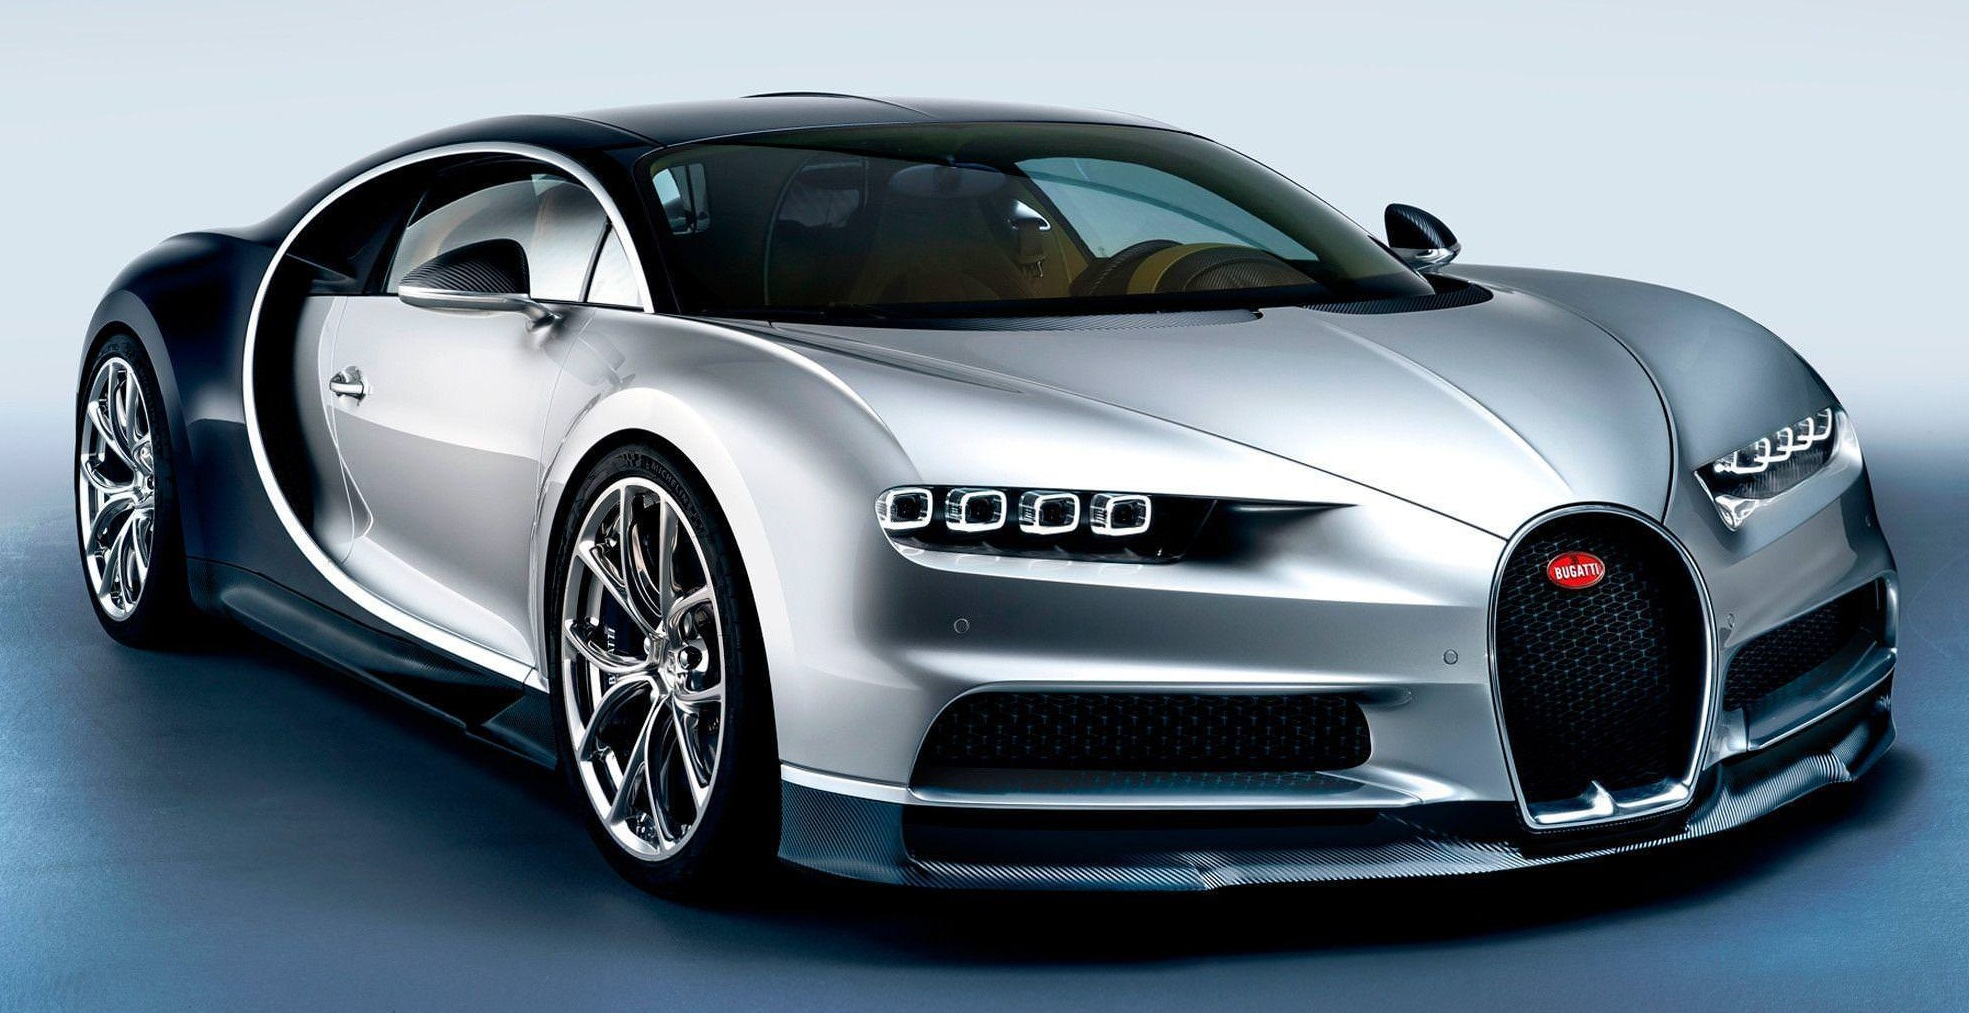

In [1]:
from IPython import display
display.Image("image.jpg")

# <span style='color:red '>1.0 Importing required libraries</span>

In [2]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

# <span style='color:red '>2.0 Importing dataset and performing descriptive analysis</span>

In [3]:
dataset=pd.read_csv('cardekho_dataset.csv', usecols=['car_name', 'brand', 'model', 'vehicle_age', 'km_driven',
       'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'])
dataset.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Feature Information
1. **car_name:** Car's Full name, which includes brand and specific model name.
2. **brand:** Brand Name of the particular car.
3. **model:** Exact model name of the car of a particular brand.
4. **seller_type:** Which Type of seller is selling the used car
5. **fuel_type:** Fuel used in the used car, which was put up on sale.
6. **transmission_type:** Transmission used in the used car, which was put on sale.
7. **vehicle_age:** The count of years since car was bought.
8. **mileage:** It is the number of kilometer the car runs per litre.
9. **engine:** It is the engine capacity in cc(cubic centimeters)
10. **max_power:** Max power it produces in BHP.
11. **seats:** Total number of seats in car.
12. **selling_price:** The sale price which was put up on website.

In [4]:
# getting null values and datatypes of all features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [5]:
### getting info about features
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_name,15411,121,Hyundai i20,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,15411,32,Maruti,4992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,15411,120,i20,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_age,15411.0,NaN,NaN,NaN,6.036338,3.013291,0.0,4.0,6.0,8.0,29.0
km_driven,15411.0,NaN,NaN,NaN,55616.480631,51618.548422,100.0,30000.0,50000.0,70000.0,3800000.0
seller_type,15411,3,Dealer,9539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,15411,5,Petrol,7643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission_type,15411,2,Manual,12225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,15411.0,NaN,NaN,NaN,19.701151,4.171265,4.0,17.0,19.67,22.7,33.54
engine,15411.0,NaN,NaN,NaN,1486.057751,521.106696,793.0,1197.0,1248.0,1582.0,6592.0


In [6]:
### checking duplicate values
dataset.duplicated().sum()

167

In [7]:
### dropping duplicate values
dataset.drop_duplicates(inplace=True)

In [8]:
### checking duplicate values after dropping duplicates
dataset.duplicated().sum()

0

## <span style='color:red '>3.0 Getting Categorical and Numerical features</span>

In [9]:
### getting count of features
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("There are {} categorical features namely: {}\n".format(len(categorical_features),categorical_features))

numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("There are {} numerical features namely: {}".format(len(numerical_features),numerical_features))

There are 6 categorical features namely: ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

There are 7 numerical features namely: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [10]:
### Getting count of categories in each features
for feature in categorical_features:
    print("The {} feature has '{}' no. of different categories".format(feature, dataset[feature].nunique()))

The car_name feature has '121' no. of different categories
The brand feature has '32' no. of different categories
The model feature has '120' no. of different categories
The seller_type feature has '3' no. of different categories
The fuel_type feature has '5' no. of different categories
The transmission_type feature has '2' no. of different categories


In [11]:
### top 10 categories in each feature percent wise
for feature in categorical_features:
    print(dataset[feature].value_counts(normalize=True)[:10]*100)
    print("*******************************************")

Hyundai i20           5.890842
Maruti Swift Dzire    5.739963
Maruti Swift          5.077408
Maruti Alto           5.038048
Honda City            4.919969
Maruti Wagon R        4.651010
Hyundai Grand         3.732616
Toyota Innova         3.568617
Hyundai Verna         3.201260
Hyundai i10           2.663343
Name: car_name, dtype: float64
*******************************************
Maruti        32.360273
Hyundai       19.364996
Honda          9.682498
Mahindra       6.553398
Toyota         5.175807
Ford           5.090527
Volkswagen     4.027814
Renault        3.457098
BMW            2.860142
Tata           2.761742
Name: brand, dtype: float64
*******************************************
i20            5.890842
Swift Dzire    5.739963
Swift          5.077408
Alto           5.038048
City           4.919969
Wagon R        4.651010
Grand          3.732616
Innova         3.568617
Verna          3.201260
i10            2.663343
Name: model, dtype: float64
***********************************

### <span style='color:red '>3.1 Brands and Cars wrt Sales</span>

In [12]:
### Brands wrt car count
pd.DataFrame(dataset.groupby('brand')['brand'].count().sort_values(ascending=False)).rename(columns={'brand':'Car Count'})

,Car Count
brand,
Maruti,4933
Hyundai,2952
Honda,1476
Mahindra,999
Toyota,789
Ford,776
Volkswagen,614
Renault,527
BMW,436


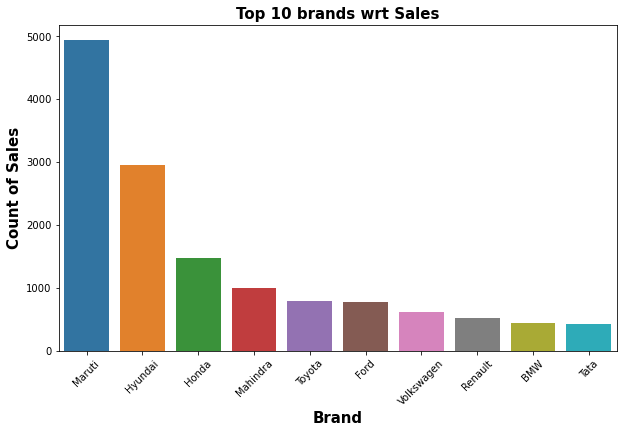

In [13]:
### Top 10 brands wrt sales
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['brand'].value_counts()[:10], x=dataset['brand'].value_counts().index[:10])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show();

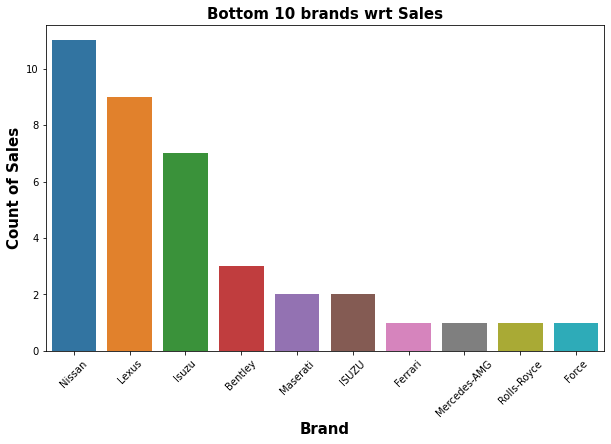

In [14]:
### Bottom 10 brands wrt sales
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['brand'].value_counts()[-10:], x=dataset['brand'].value_counts().index[-10:])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Sales",fontsize=15, fontweight='bold')
plt.show();

In [15]:
### Top 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[:10]).rename(columns={'car_name':'Car Count'})

,Car Count
car_name,
Hyundai i20,898
Maruti Swift Dzire,875
Maruti Swift,774
Maruti Alto,768
Honda City,750
Maruti Wagon R,709
Hyundai Grand,569
Toyota Innova,544
Hyundai Verna,488


In [16]:
### Bottom 10 Cars
pd.DataFrame(dataset.groupby('car_name')['car_name'].count().sort_values(ascending=False)[-10:]).rename(columns={'car_name':'Car Count'})

,Car Count
car_name,
ISUZU MUX,2
Isuzu MUX,1
Hyundai Aura,1
Mercedes-AMG C,1
Maserati Quattroporte,1
Maserati Ghibli,1
Rolls-Royce Ghost,1
Ferrari GTC4Lusso,1
Force Gurkha,1


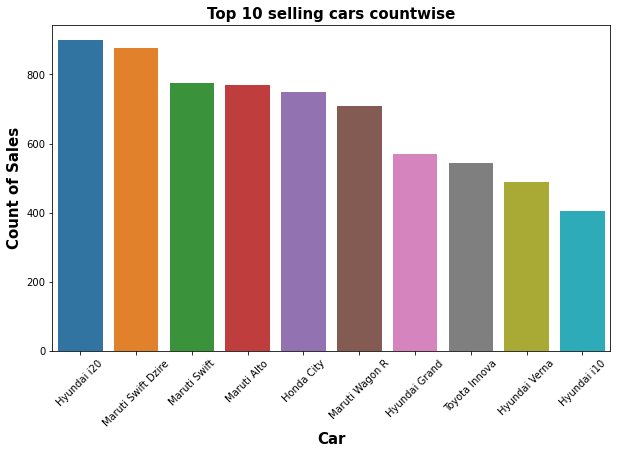

In [17]:
### Top 10 selling cars countwise
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['car_name'].value_counts()[:10], x=dataset['car_name'].value_counts().index[:10])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 selling cars countwise",fontsize=15, fontweight='bold')
plt.show();

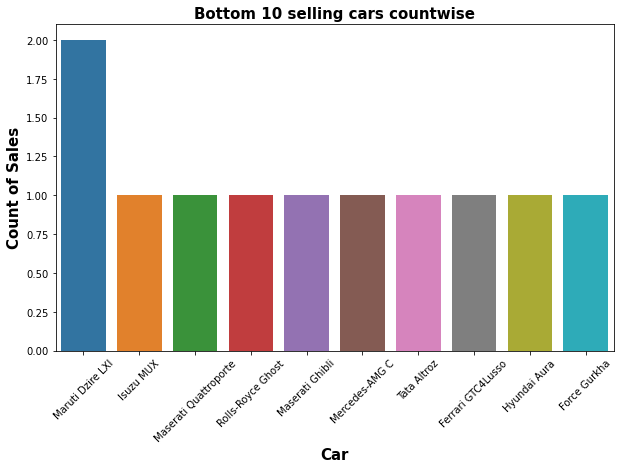

In [18]:
### Bottom 10 selling cars countwise
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['car_name'].value_counts()[-10:], x=dataset['car_name'].value_counts().index[-10:])
plt.ylabel('Count of Sales', fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 selling cars countwise",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Maruti has most no of sales followed by hyundai and honda.
2. Whereas force, Rolls-royce, ferrari and Mercedes_AMG have least no. of sales.
3. Hyundai i20 is highest selling car followed by Swift dezire and swift. 
4. Whereas force  Gurkha, Hyundai aura, ferrari GTC4Lusso ,etc are least selling cars.

### <span style='color:red '>3.2 Brands and Cars wrt Total Selling Price</span>

In [19]:
### Brands wrt Total Selling Price
pd.DataFrame(dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)).rename(columns={'selling_price':'Total Selling Price'})

,Total Selling Price
brand,
Maruti,2402298875
Hyundai,1701766000
BMW,1171390000
Toyota,1082111000
Honda,911360000
Mercedes-Benz,823437000
Mahindra,787825000
Ford,491764000
Audi,374443000


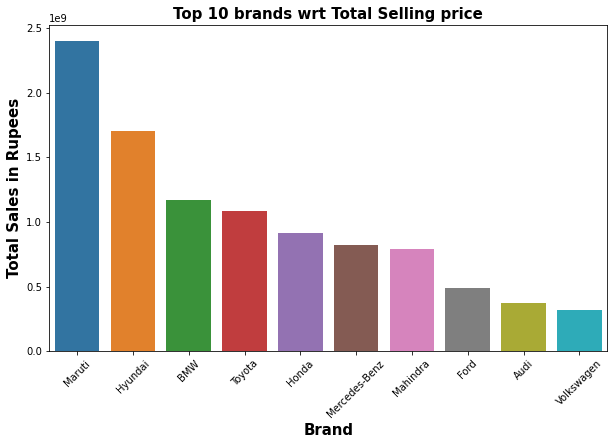

In [20]:
### Top 10 brands
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

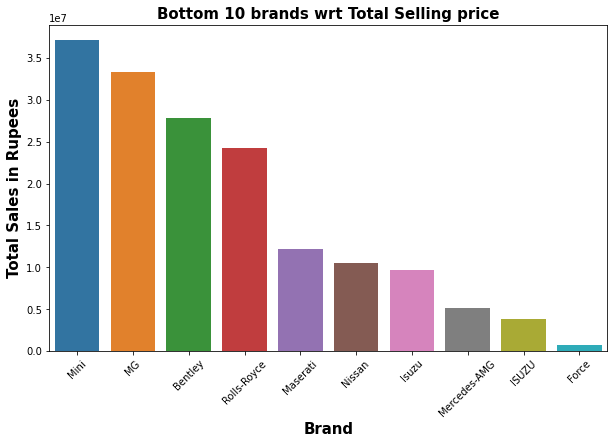

In [21]:
### Bottom 10 brands
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.ylabel('Total Sales in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

In [22]:
### Top 10 Cars wrt Total Selling Price
pd.DataFrame(dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Total Selling Price'})

,Total Selling Price
car_name,
Toyota Innova,639831000
Hyundai i20,487790000
Honda City,468565000
Maruti Swift Dzire,459811000
Maruti Swift,365551000
Toyota Fortuner,364188000
Hyundai Creta,343551000
BMW 5,337804000
Mahindra XUV500,329429000


In [23]:
### Bottom 10 Cars wrt Total Selling Price
pd.DataFrame(dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Toatl Selling Price'})

,Toatl Selling Price
car_name,
Honda CR,4415000
ISUZU MUX,3795000
Datsun redi-GO,3212000
Isuzu MUX,2300000
Maruti Dzire ZXI,2200000
Nissan X-Trail,2135000
Hyundai Aura,900000
Maruti Dzire LXI,885000
Tata Altroz,730000


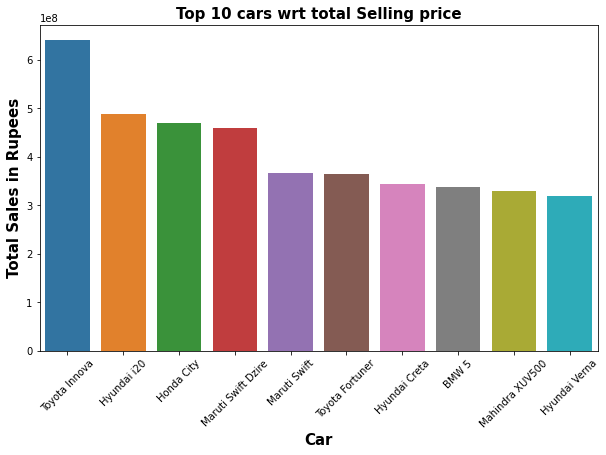

In [24]:
### Top 10 selling cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[:10])
plt.ylabel('Total Sales in Rupees',fontsize=15,  fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 cars wrt total Selling price",fontsize=15, fontweight='bold')
plt.show();

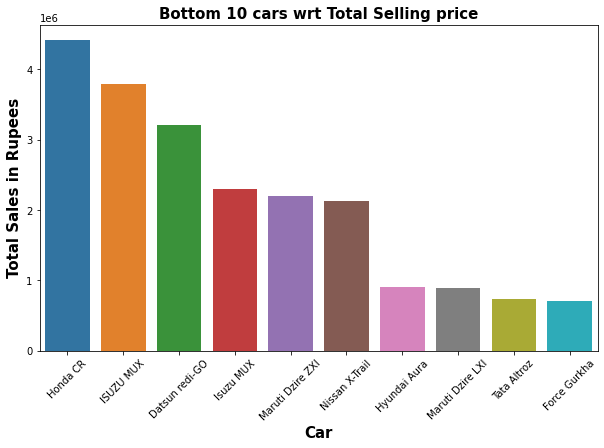

In [25]:
### Bottom 10 selling cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name')['selling_price'].sum().sort_values(ascending=False).index[-10:])
plt.ylabel('Total Sales in Rupees',fontsize=15,  fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 cars wrt Total Selling price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Maruti has highest Total amount of sales followed by hyundai and BMW.
2. Whereas force, ISUZU, Mercedes_AMG and Nissan have least Total amount of sales in that order.
3. Toyota Innova has highest total amount of sales followed by Hyundai i20 and Honda City. 
4. Whereas force Gurkha, Tata Altroz, Maruti dzire LXI  have least total amount of car sales.

### <span style='color:red '>3.3 Brands and Cars wrt Costliest Cars</span>

In [26]:
### Brands wrt Costliest Car
pd.DataFrame(dataset.groupby('brand')['selling_price'].max().sort_values(ascending=False)).rename(columns={'selling_price':'Costliest Car Price'})

,Costliest Car Price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


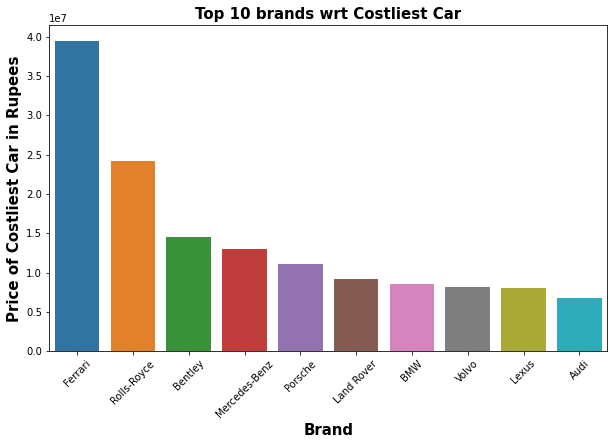

In [27]:
### Top 10 brand wrt Costliest car
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').selling_price.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').selling_price.max().sort_values(ascending=False).index[:10])
plt.ylabel('Price of Costliest Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Costliest Car",fontsize=15, fontweight='bold')
plt.show();

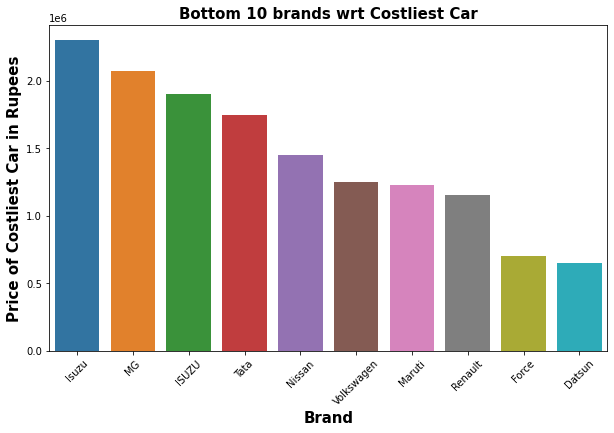

In [28]:
### Bottom 10 brand wrt Costliest cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').selling_price.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').selling_price.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Price of Costliest Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Costliest Car",fontsize=15, fontweight='bold')
plt.show();

In [29]:
### Top 10 Costliest Car
pd.DataFrame(dataset.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[:10]).rename(columns={'selling_price':'Car Price'})

,Car Price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


In [30]:
### Bottom 10 Costliest Car
pd.DataFrame(dataset.groupby('car_name')['selling_price'].max().sort_values(ascending=False)[-10:]).rename(columns={'selling_price':'Car Price'})

,Car Price
car_name,
Maruti Wagon R,625000
Maruti Celerio,595000
Maruti S-Presso,550000
Renault KWID,550000
Maruti Dzire LXI,500000
Hyundai i10,500000
Maruti Eeco,490000
Maruti Alto,485000
Datsun redi-GO,435000


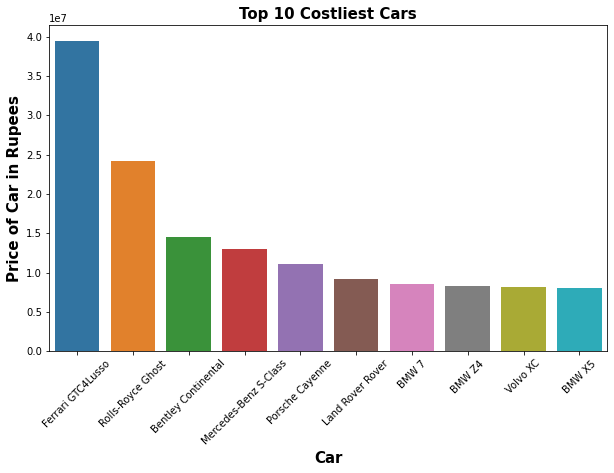

In [31]:
### Top 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False).index[:10:])
plt.ylabel('Price of Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Costliest Cars",fontsize=15, fontweight='bold')
plt.show();

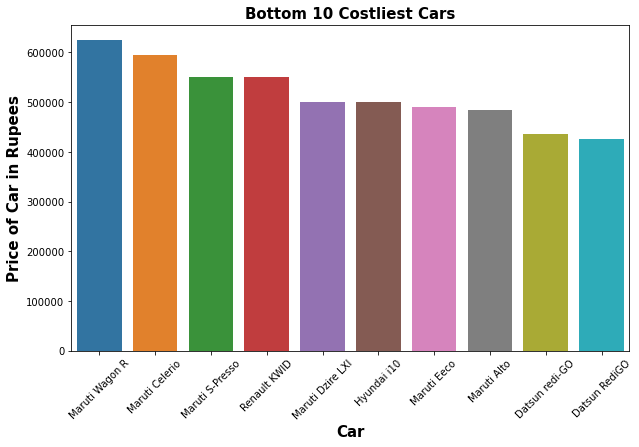

In [32]:
### Bottom 10 costliest cars
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').selling_price.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Price of Car in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Costliest Cars",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Ferrari has Costliest car followed by Rolls-Royce and Bentley.
2. Datsun has cheapest car followed by Force and Renault.
3. Ferrari GTC4Lusso is costliest car followed by Rolls-Royce Ghost and bentley Continental.
4. Datsun RediGO is cheapest car followed by Maruti Alto and Maruti Eeco.

### <span style='color:red '>3.4 Brands and Cars wrt Mileage</span>

In [33]:
### Brand wrt Average Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)).rename(columns={'mileage':'Average mileage'})

,Average mileage
brand,
Maruti,22.425520
Renault,22.073586
Datsun,21.215647
Lexus,20.676667
Ford,19.970335
Honda,19.901463
Maserati,19.820000
Tata,19.780855
Hyundai,19.590650


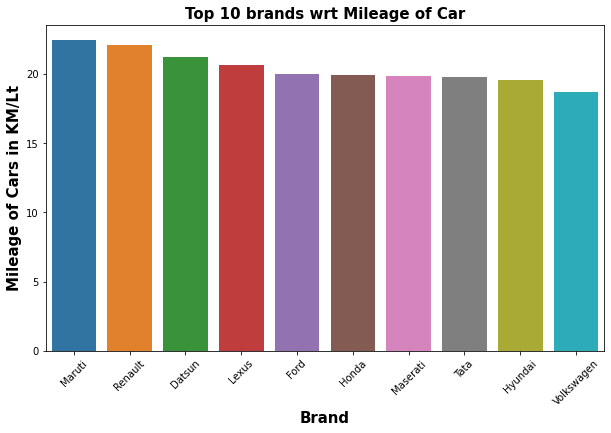

In [34]:
### Top 10 brand wrt Mileage of cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').mileage.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').mileage.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 brands wrt Mileage of Car",fontsize=15, fontweight='bold')
plt.show();

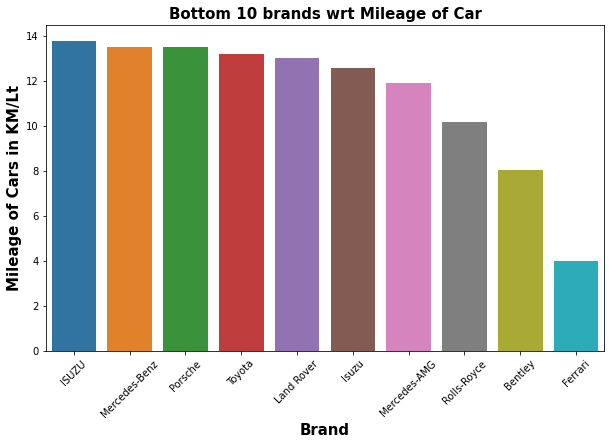

In [35]:
### Top 10 brand wrt Mileage of cars 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').mileage.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').mileage.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 brands wrt Mileage of Car",fontsize=15, fontweight='bold')
plt.show();

In [36]:
### Top 10 car wrt Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)[:10]).rename(columns={'mileage':'Average mileage'})

,Average mileage
brand,
Maruti,22.425520
Renault,22.073586
Datsun,21.215647
Lexus,20.676667
Ford,19.970335
Honda,19.901463
Maserati,19.820000
Tata,19.780855
Hyundai,19.590650


In [37]:
### Bottom 10 car wrt Mileage
pd.DataFrame(dataset.groupby('brand')['mileage'].mean().sort_values(ascending=False)[-10:]).rename(columns={'mileage':'Average mileage'})

,Average mileage
brand,
ISUZU,13.800000
Mercedes-Benz,13.531054
Porsche,13.515714
Toyota,13.207414
Land Rover,13.038400
Isuzu,12.600000
Mercedes-AMG,11.900000
Rolls-Royce,10.200000
Bentley,8.033333


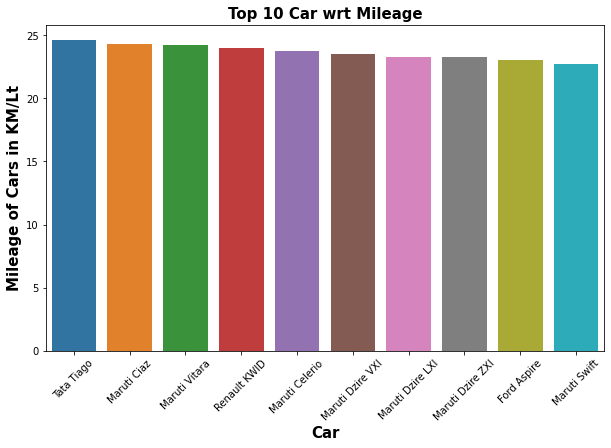

In [38]:
### Top 10 car wrt Mileage 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Mileage",fontsize=15, fontweight='bold')
plt.show();

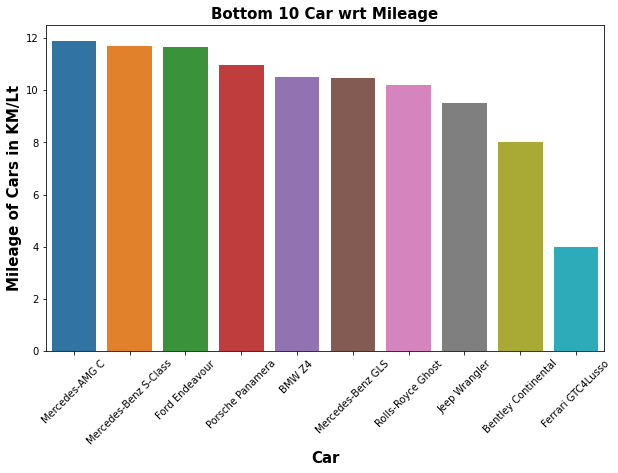

In [39]:
### bottom 10 car wrt Mileage 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').mileage.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mileage of Cars in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Mileage",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Maruti cars have highest average mileage followed by Renault and Datsun.
2. Ferrari cars have least average Mileage followed by Bentely and Rolls Royce.
3. Tata Tiago has highest average mileage followed by Maruti Ciaz and Maruti Vitara.
4. Ferrari GTC4Lusso has least average Mileage followed by bentley Continental and Jeep Wrangler.

### <span style='color:red '>3.5 Brands and Cars wrt Max Power</span>

In [40]:
### Brands wrt Mean Max Power
pd.DataFrame(dataset.groupby('brand')['max_power'].mean().sort_values(ascending=False)).rename(columns={'max_power':'Mean Max Power'})

,Mean Max Power
brand,
Ferrari,601.000000
Bentley,592.666667
Rolls-Royce,563.000000
Mercedes-AMG,362.070000
Porsche,299.028571
Maserati,270.940000
Lexus,219.912222
Mercedes-Benz,210.780120
Land Rover,210.237400


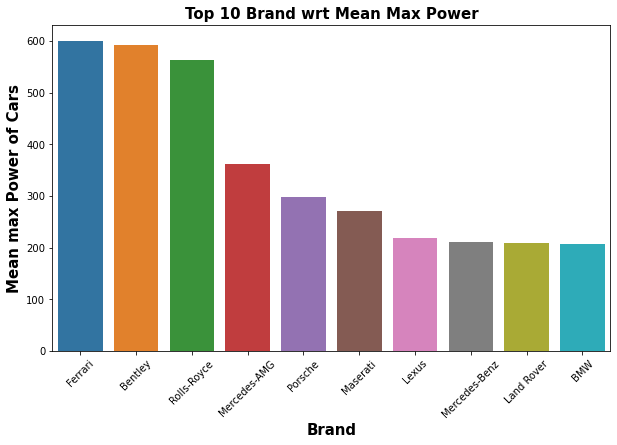

In [41]:
### Top 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').max_power.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').max_power.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mean max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Brand wrt Mean Max Power",fontsize=15, fontweight='bold')
plt.show();

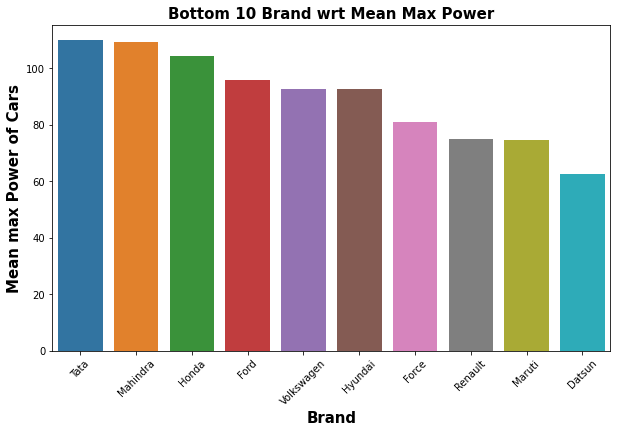

In [42]:
### Bottom 10 Brands wrt Mean Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').max_power.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').max_power.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mean max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Brand wrt Mean Max Power",fontsize=15, fontweight='bold')
plt.show();

In [43]:
### Top 10 Cars wrt Max Power
pd.DataFrame(dataset.groupby('car_name')['max_power'].max().sort_values(ascending=False)[:10]).rename(columns={'max_power':'Max Power'})

,Max Power
car_name,
Bentley Continental,626.00
Ferrari GTC4Lusso,601.00
Rolls-Royce Ghost,563.00
Porsche Cayenne,500.00
Mercedes-Benz S-Class,459.00
BMW 6,450.00
BMW 7,402.00
Porsche Panamera,394.30
Mercedes-AMG C,362.07


In [44]:
### Bottom 10 Cars wrt Max Power
pd.DataFrame(dataset.groupby('car_name')['max_power'].max().sort_values(ascending=False)[-10:]).rename(columns={'max_power':'Max Power'})

,Max Power
car_name,
Datsun GO,76.43
Maruti Eeco,73.00
Renault Triber,72.00
Hyundai Santro,68.07
Datsun RediGO,68.00
Maruti Alto,67.10
Maruti Celerio,67.05
Datsun redi-GO,67.05
Renault KWID,67.00


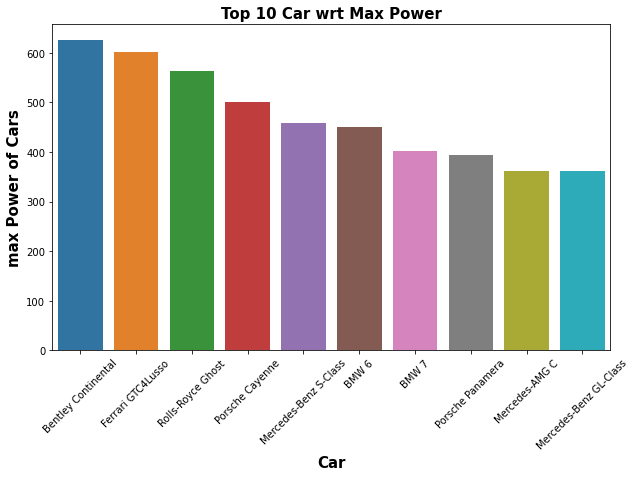

In [45]:
### Top 10 car wrt Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').max_power.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').max_power.max().sort_values(ascending=False).index[:10])
plt.ylabel('max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Max Power",fontsize=15, fontweight='bold')
plt.show();

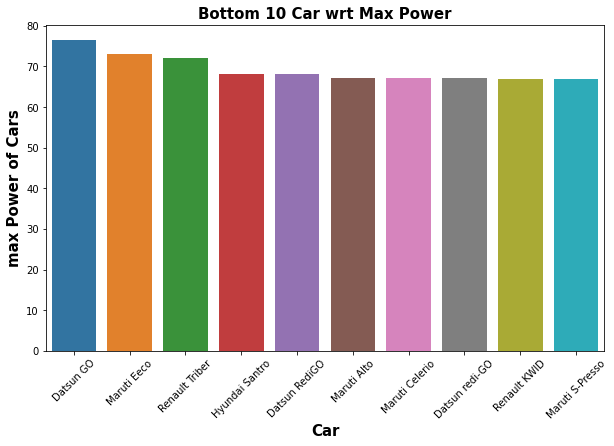

In [46]:
### Top 10 car wrt Max Power 
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').max_power.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').max_power.max().sort_values(ascending=False).index[-10:])
plt.ylabel('max Power of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Max Power",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Ferrari has highest Mean Max Power followed by Bentley and Rolls-Royce.
2. Datsun has least Mean Max Power followed by Maruti and Renault.
3. Bentley Continental has highest Mean Max Power followed by Ferrari GTC4lusso and Rolls-Royce Ghost.
4. Maruti S-Presso least Mean Max Power followed by Renault KWID and Datsun RediGo.

### <span style='color:red '>3.6 Brands and Cars wrt Km Driven</span>

In [47]:
### Brands wrt Mean KM Driven
pd.DataFrame(dataset.groupby('brand')['km_driven'].mean().sort_values(ascending=False)).rename(columns={'km_driven':'Mean KM Driven'})

,Mean KM Driven
brand,
Toyota,91840.925222
Mahindra,73075.585586
Isuzu,69876.000000
Land Rover,65874.760000
Skoda,64784.492492
Volkswagen,62849.574919
Volvo,61232.300000
Force,60000.000000
Mercedes-Benz,59471.605422


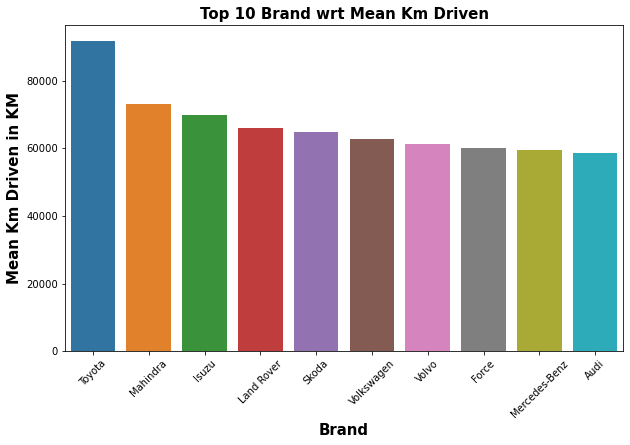

In [48]:
### Top 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False)[:10],
            x=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False).index[:10])
plt.ylabel('Mean Km Driven in KM',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Brand wrt Mean Km Driven",fontsize=15, fontweight='bold')
plt.show();

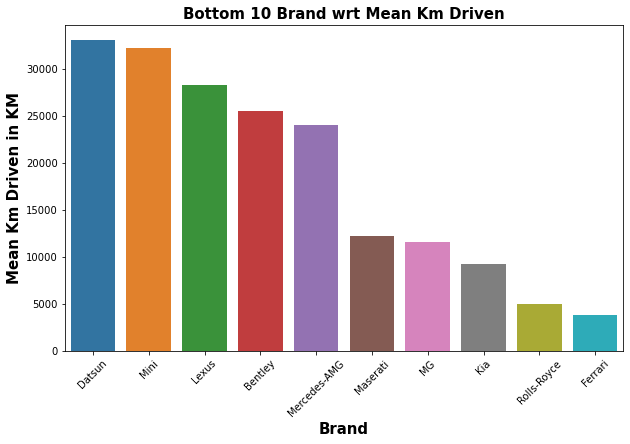

In [49]:
### Bottom 10 Brands wrt Mean Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False)[-10:],
            x=dataset.groupby('brand').km_driven.mean().sort_values(ascending=False).index[-10:])
plt.ylabel('Mean Km Driven in KM',fontsize=15, fontweight='bold')
plt.xlabel("Brand",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Brand wrt Mean Km Driven",fontsize=15, fontweight='bold')
plt.show();

In [50]:
### Top 10 car wrt Km Driven
pd.DataFrame(dataset.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[10:]).rename(columns={'km_driven':'Max KM Driven'})

,Max KM Driven
car_name,
Ford Figo,570000
Honda Jazz,525000
Mahindra Bolero,500000
Maruti Ciaz,480000
Maruti Vitara,480000
...,...
Maserati Quattroporte,9500
Rolls-Royce Ghost,5000
Hyundai Aura,4500


In [51]:
### Bottom 10 car wrt Km Driven
pd.DataFrame(dataset.groupby('car_name')['km_driven'].max().sort_values(ascending=False)[-10:]).rename(columns={'km_driven':'Max KM Driven'})

,Max KM Driven
car_name,
Maruti XL6,23000
Maserati Ghibli,15000
Kia Carnival,14000
BMW X4,14000
Maruti S-Presso,12000
Maserati Quattroporte,9500
Rolls-Royce Ghost,5000
Hyundai Aura,4500
Tata Altroz,3800


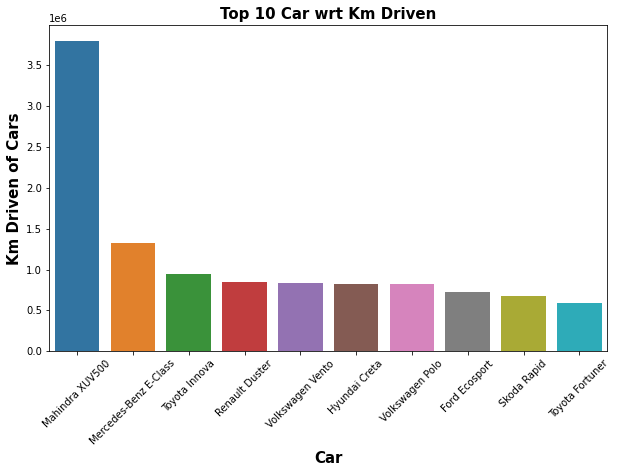

In [52]:
### Top 10 car wrt Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False)[:10],
            x=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False).index[:10])
plt.ylabel('Km Driven of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Top 10 Car wrt Km Driven",fontsize=15, fontweight='bold')
plt.show();

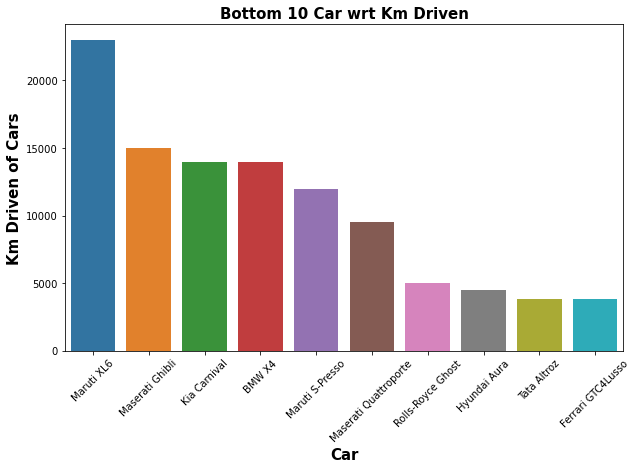

In [53]:
### Bottom 10 car wrt Km Driven
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False)[-10:],
            x=dataset.groupby('car_name').km_driven.max().sort_values(ascending=False).index[-10:])
plt.ylabel('Km Driven of Cars',fontsize=15, fontweight='bold')
plt.xlabel("Car",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Bottom 10 Car wrt Km Driven",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Toyota cars have highest Mean KM Driven followed by Mahindra and isuzu.
2. Ferrari cars have least Mean KM Driven followed by Rolls-Royce and Kia.
3. Mahindra XUV500 has highest KM Driven followed by Mercedes-Benz E-class and Toyota Innova.
4. Ferrari GTC4lusso has least KM Driven followed by Tata Altroz and Hyundai Aura.

### <span style='color:red '>3.7 KM Driven and Seller Type vs Selling Price</span>

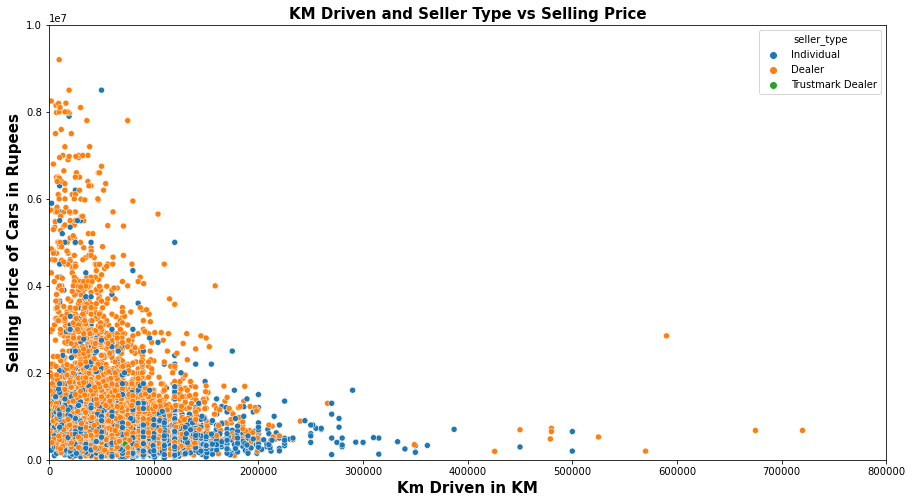

In [54]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['seller_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and Seller Type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. It is difficult to sell car if Km Driven is greater than 20K.
2. As the Km driven increases the the Selling price of cars Decreases.
3. It is easy to sell cars at higher price if it is sold by a dealer.

### <span style='color:red '>3.8 KM Driven and transmission_type vs Selling Price</span>

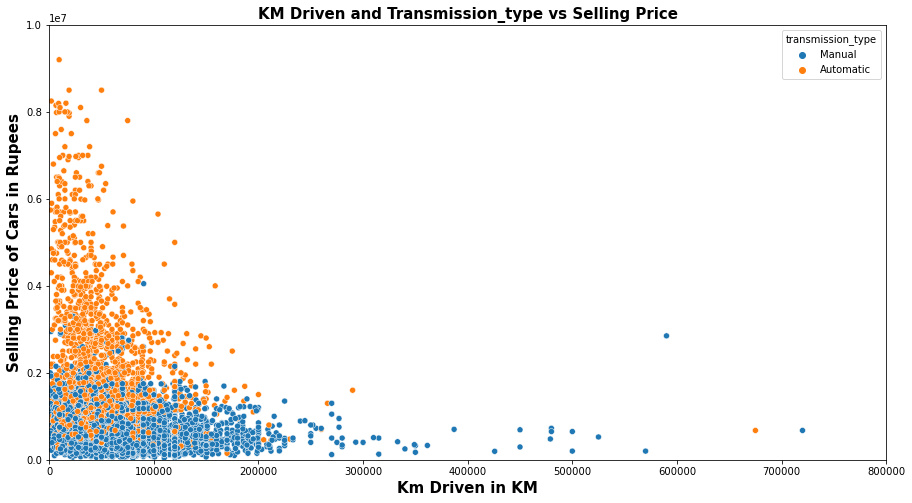

In [55]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['transmission_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and Transmission_type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. It is difficult to sell car if Km Driven is greater than 20K.
2. As the Km driven increases the the Selling price of cars Decreases.
3. Automatic Transmission cars sell at higher rate than manual Transmission cars.

### <span style='color:red '>3.9 KM Driven and fuel_type vs Selling Price</span>

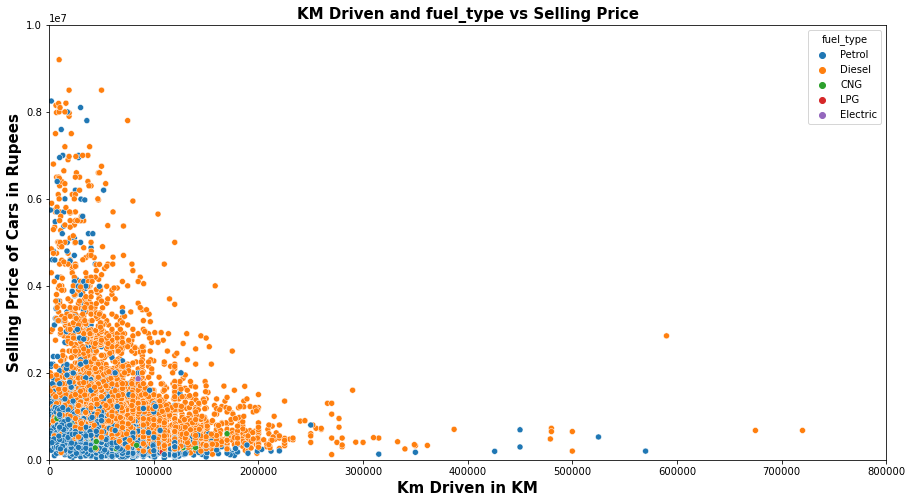

In [56]:
### Km driven wrt selling price
plt.figure(figsize=(15,8))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['fuel_type'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven and fuel_type vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. It is difficult to sell car if Km Driven is greater than 20K.
2. As the Km driven increases the the Selling price of cars Decreases.
3. Majority of cars are either diesel or petrol.

### <span style='color:red '>3.10 KM Driven and seats vs Selling Price</span>

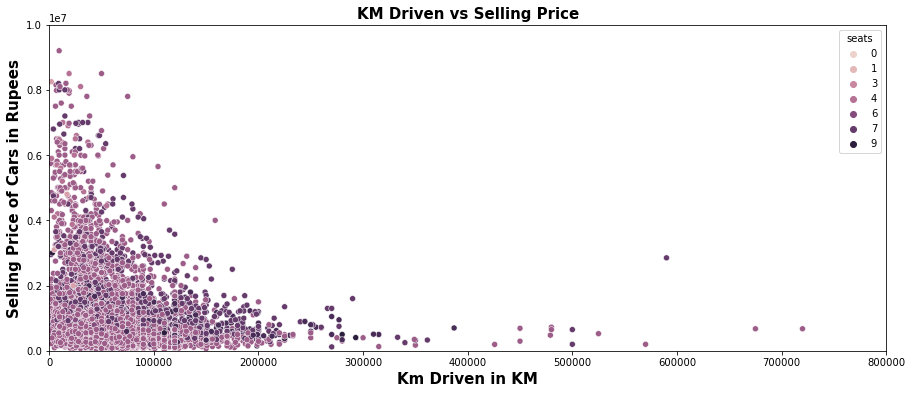

In [57]:
### Km driven wrt selling price
plt.figure(figsize=(15,6))
sns.scatterplot(y=dataset['selling_price'], x=dataset['km_driven'], hue=dataset['seats'])
plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Km Driven in KM",fontsize=15, fontweight='bold')
plt.xlim(0,800000) #limit is used for scaling the axis
plt.ylim(0,10000000)
plt.title("KM Driven vs Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. It is difficult to sell car if Km Driven is greater than 20K.
2. As the Km driven increases the the Selling price of cars Decreases.
3. Market is dominated by 3, 4 and 6 seater cars.
4. As no. of seats decreases the selling price of cars increases.

### <span style='color:red '>3.11 Numerical features and categorical features vs Selling Price</span>

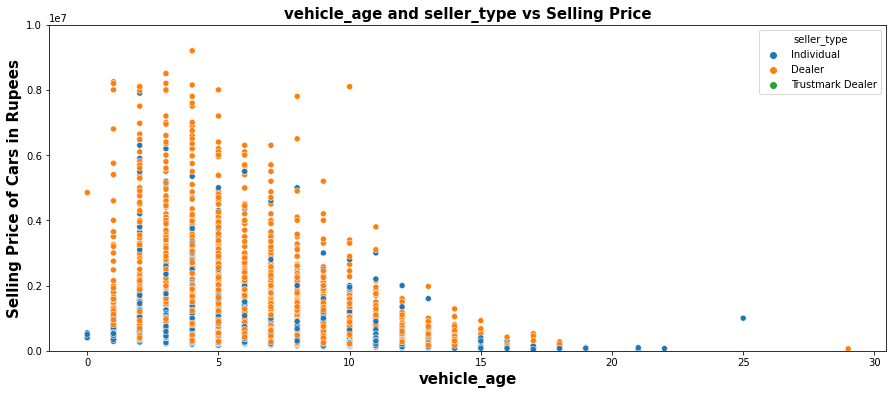

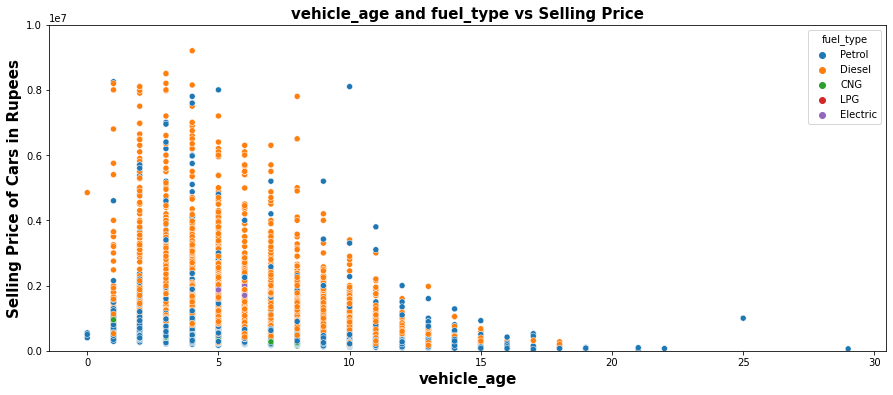

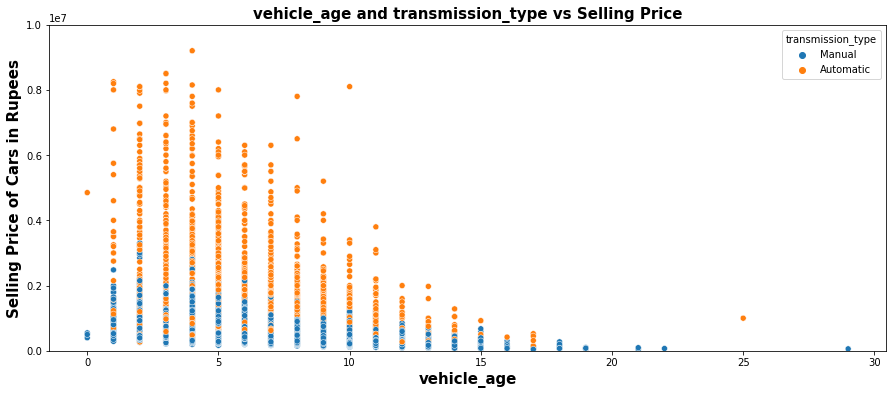

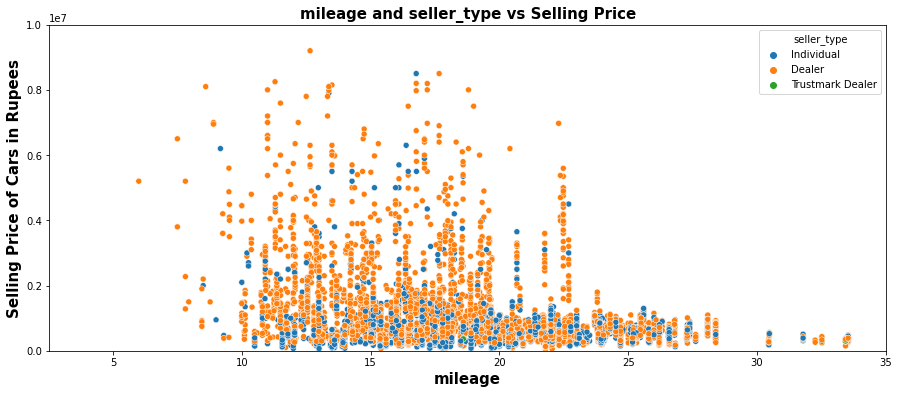

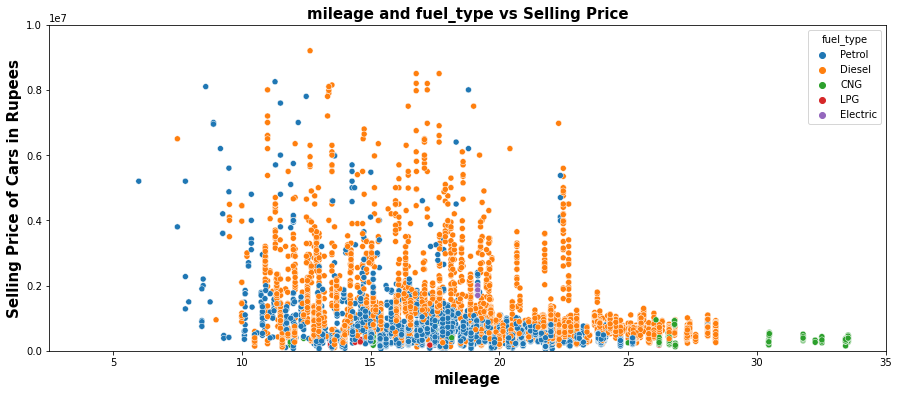

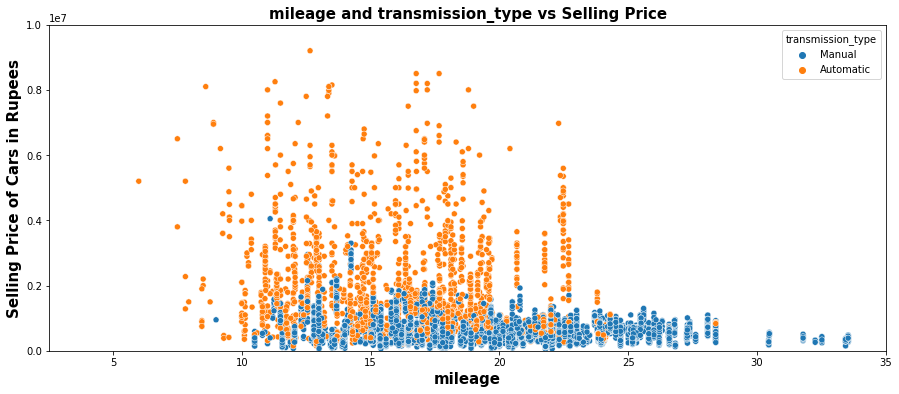

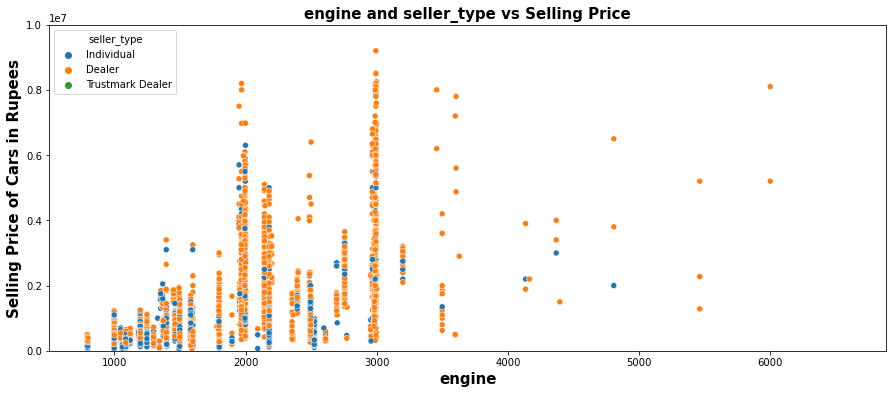

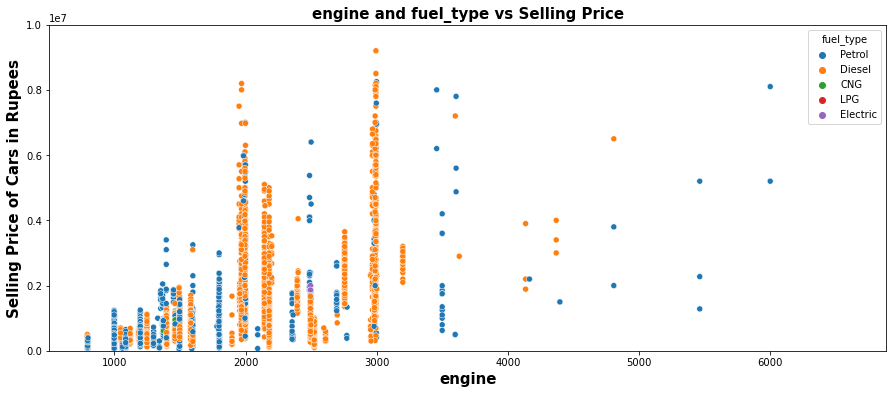

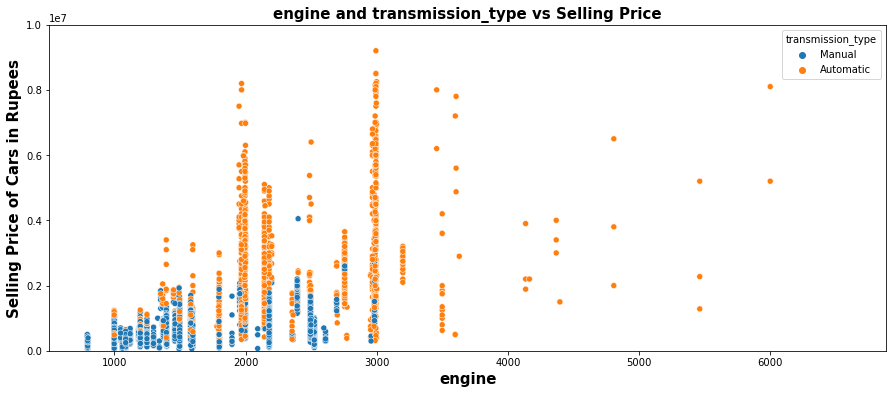

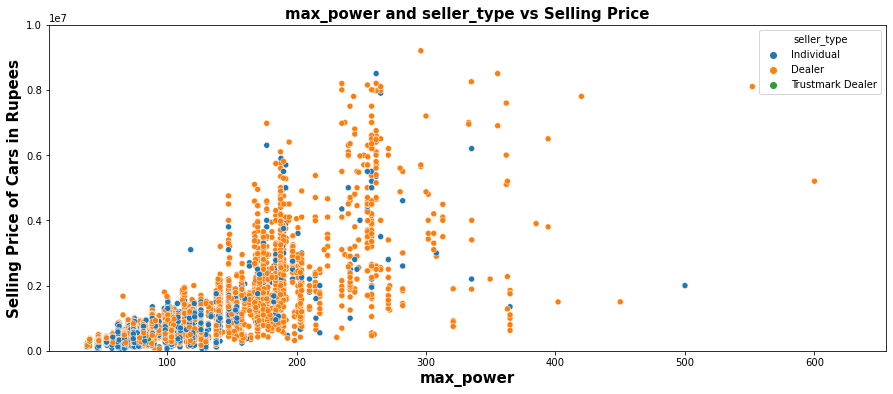

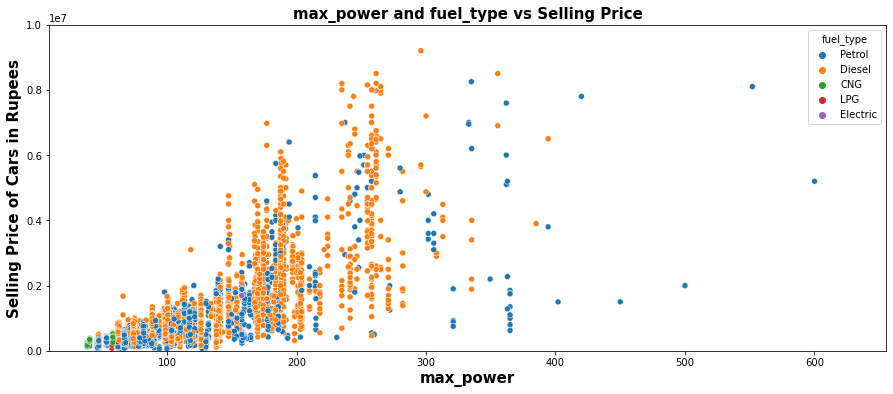

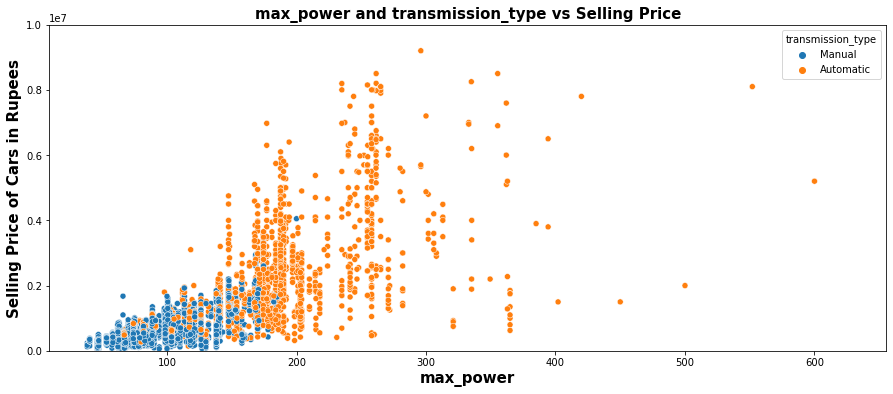

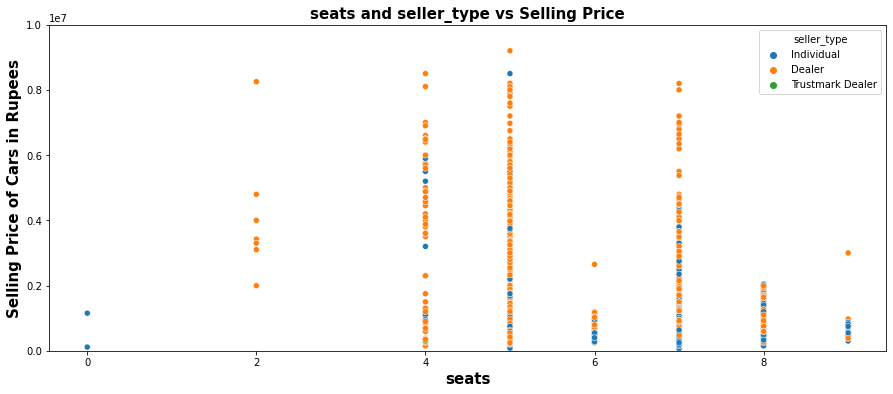

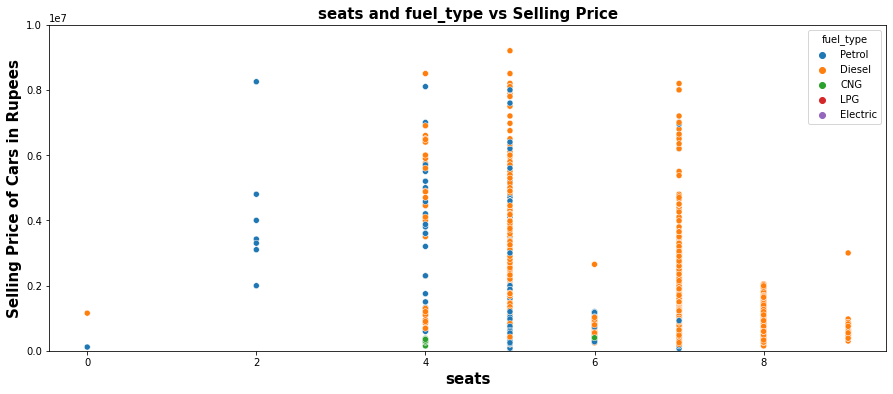

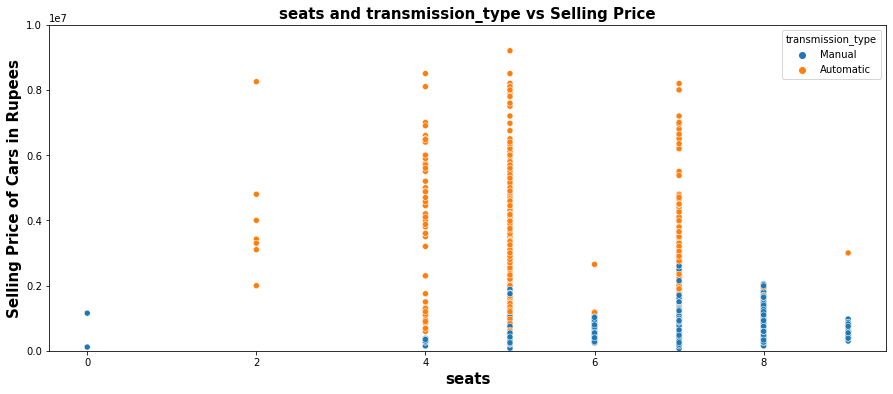

In [58]:
for i in [feature for feature in numerical_features if feature not in ['selling_price', 'km_driven']]:
    for j in ['seller_type', 'fuel_type', 'transmission_type']:
        plt.figure(figsize=(15,6))
        sns.scatterplot(y=dataset['selling_price'], x=dataset[i], hue=dataset[j])
        plt.ylabel('Selling Price of Cars in Rupees',fontsize=15, fontweight='bold')
        plt.xlabel("{}".format(i),fontsize=15, fontweight='bold')
        plt.ylim(0,10000000)
        plt.title("{} and {} vs Selling Price".format(i,j),fontsize=15, fontweight='bold')
        plt.show();

### <span style='color:blue'>Observation</span>

1. As the vehicle age increase the selling price of vehicle decreases.
2. Dealers are able to sell the cars at higher price than individual owners.
3. Between 1 to 7 vehicle age seller has better chance to get a good price of car.
4. On an average disesl cars are more in demand than petrol car and they sell for higher price.
5. Majority of cars are either diesel or petrol.
6. Automatic transmission cars recieve higher selling price than manual transmission cars.
7. Majority of cars have mileage between 10 to 26 Km/Lt.
8. Cars having mileage between 10 to 20 may get higher selling price offer.
9. It is evident that CNG cars have more mileage than petrol and diesel.
10. Manual transmission cars have more Mileage in comparision to Automatic transmiossion cars.
11. Engine with 1000 to 3000 bhp get more buyer attention.
12. As the max power increases the selling price of cars also increases.
13. Majority of high power cars is sold by dealers.
14. Diesel cars have more power in comparision to Petrol cars.
15. Cars with high power generally comes with automatic transmission.
16. Majority of cars have 4,5 and 7 seats.
17. More than 6 seater car is usually diesel car.

### <span style='color:red '>3.12 Fuel Type analysis</span>

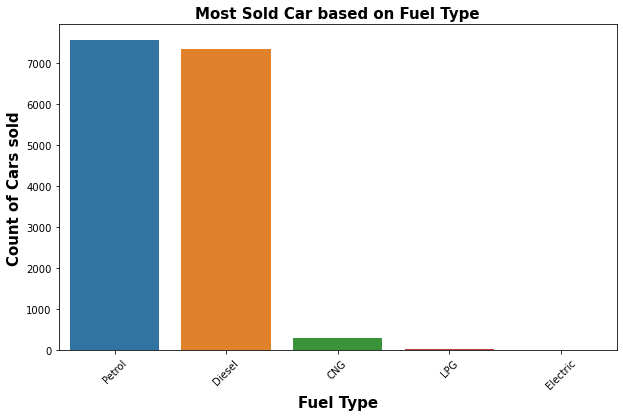

In [59]:
### most cars sold on fuel type
plt.figure(figsize=(10,6))
sns.countplot(x=dataset['fuel_type'])
plt.ylabel("Count of Cars sold",fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Most Sold Car based on Fuel Type",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Petrol varient have highest Number of cars followed by diesel and CNG.
2. Electric cars, CNG and LPG cars are very few in number.

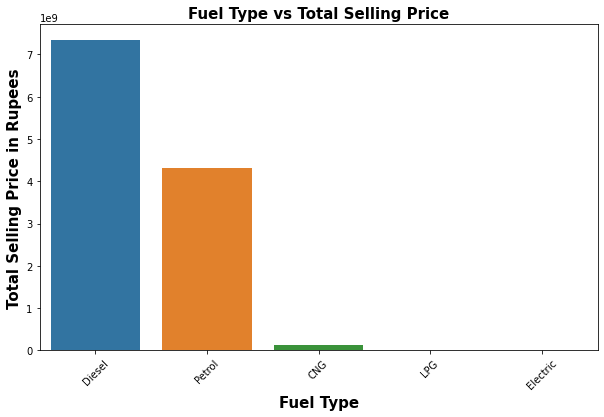

In [60]:
### fuel type vs total selling price
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False),
            x=dataset.groupby('fuel_type')['selling_price'].sum().sort_values(ascending=False).index)
plt.ylabel('Total Selling Price in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Total Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Diesel cars have highest total sales followed by petrol.
2. The combined total sales of CNG, LPG and Electric is negligible as compared to Diesel and Petrol.

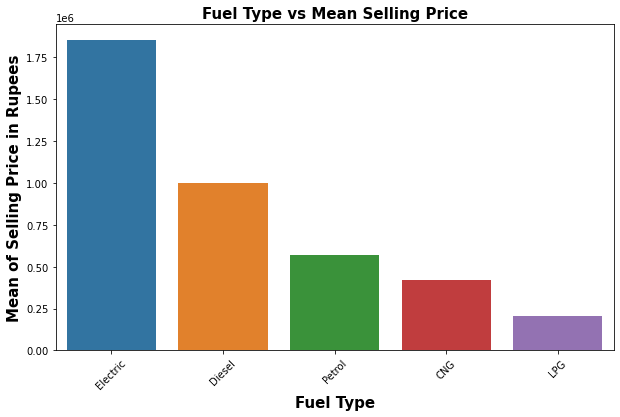

In [61]:
### fuel type vs average selling price
plt.figure(figsize=(10,6))
sns.barplot(y=dataset.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False),
            x=dataset.groupby('fuel_type')['selling_price'].mean().sort_values(ascending=False).index)
plt.ylabel('Mean of Selling Price in Rupees',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Mean Selling Price",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. Electric cars have highest average selling price followed by Diesel and Petrol.
2. LPG has least average selling price.
3. Electric vehicles are twice costlier than diesel car and thrice costlier than petrol cars.

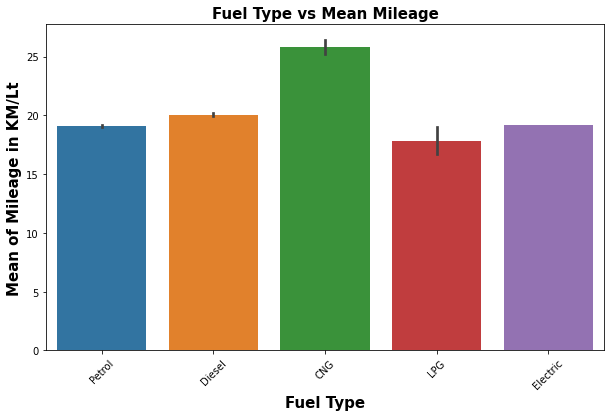

In [62]:
### Fuel Type vs Average Mileage
plt.figure(figsize=(10,6))
sns.barplot(y=dataset['mileage'],
            x=dataset['fuel_type'])
plt.ylabel('Mean of Mileage in KM/Lt',fontsize=15, fontweight='bold')
plt.xlabel("Fuel Type",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("Fuel Type vs Mean Mileage",fontsize=15, fontweight='bold')
plt.show();

### <span style='color:blue'>Observation</span>

1. CNG cars have highest average Mileage followed by diesel, petrol and electric cars.
2. LPG has least average Mileage.

### <span style='color:red '>3.13 Vehicle age vs Selling Price</span>

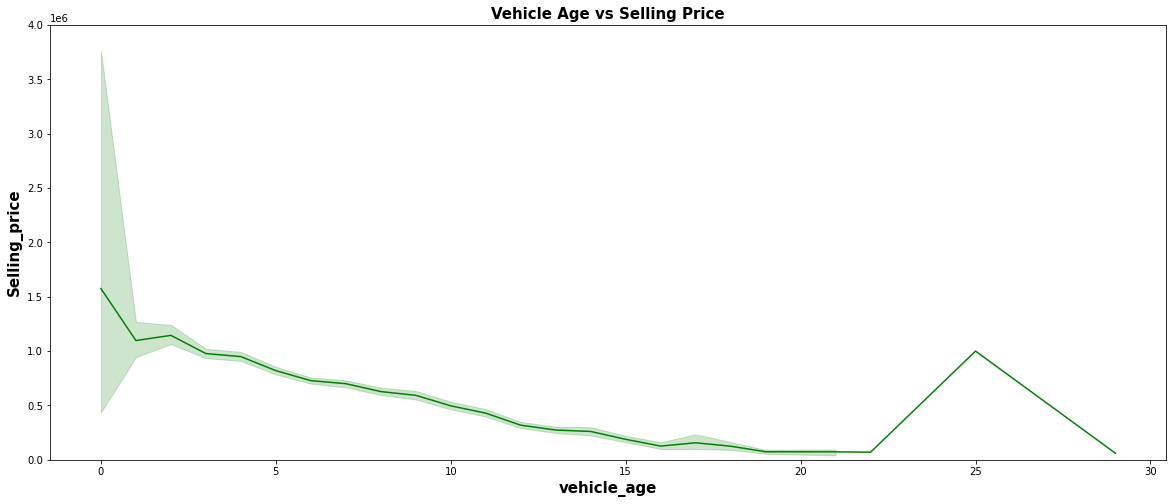

In [65]:
plt.subplots(figsize=(20,8))
sns.lineplot(x=dataset['vehicle_age'],y=dataset['selling_price'], color='green')
plt.ylabel('Selling_price', fontsize=15, fontweight='bold')
plt.xlabel('vehicle_age', fontsize=15, fontweight='bold')
plt.title('Vehicle Age vs Selling Price', fontsize=15, fontweight='bold')
plt.ylim(0,4000000)
plt.show()

### <span style='color:blue'>Observation</span>

1. As the vehicle age increases the selling price of vehicles decreases.
2. The exception is for cars having age between 22 to 25 years. 

### <span style='color:red '>3.14 Vehicle age vs Mileage</span>

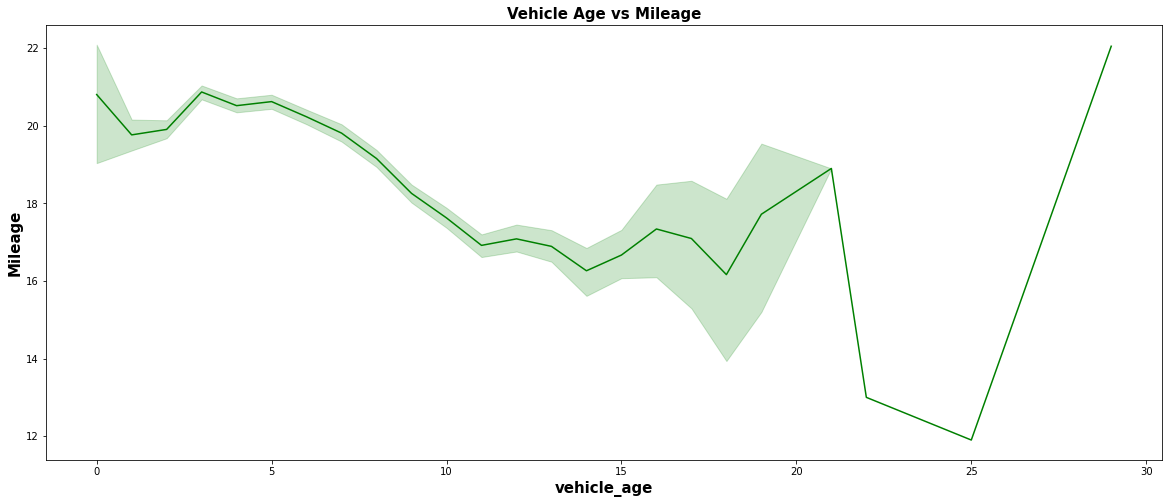

In [66]:
plt.subplots(figsize=(20,8))
sns.lineplot(x=dataset['vehicle_age'],y=dataset['mileage'], color='green')
plt.ylabel('Mileage', fontsize=15, fontweight='bold')
plt.xlabel('vehicle_age', fontsize=15, fontweight='bold')
plt.title('Vehicle Age vs Mileage', fontsize=15, fontweight='bold')
plt.show()

### <span style='color:blue'>Observation</span>

1. As the vehicle age increases the Average mileage decreases.

### <span style='color:red '>3.15 Distribution of Numerical Features</span>

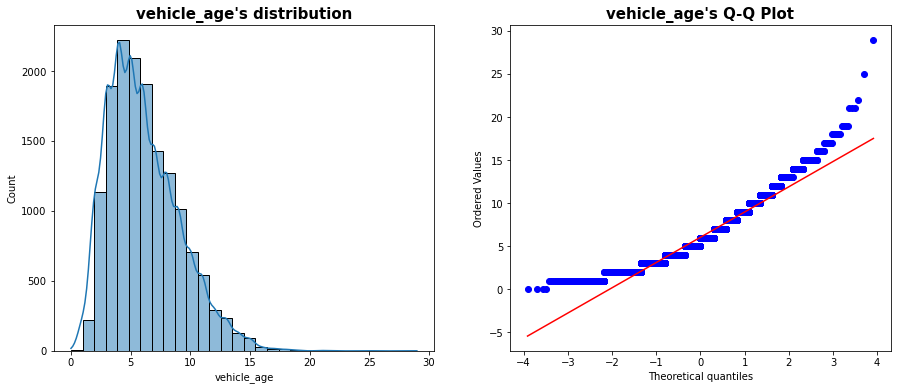

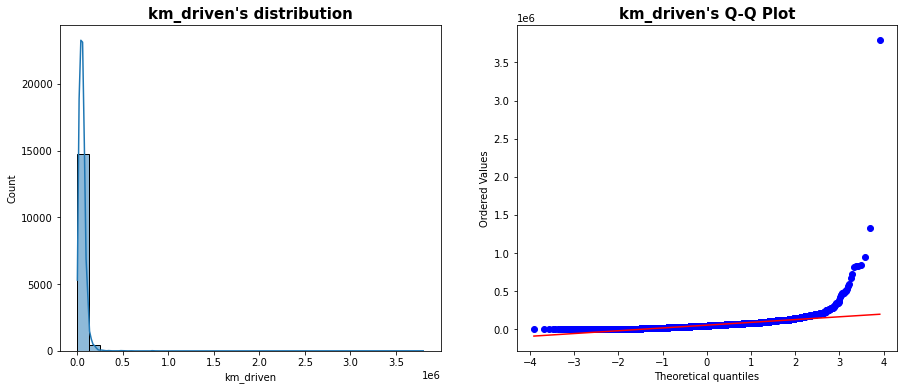

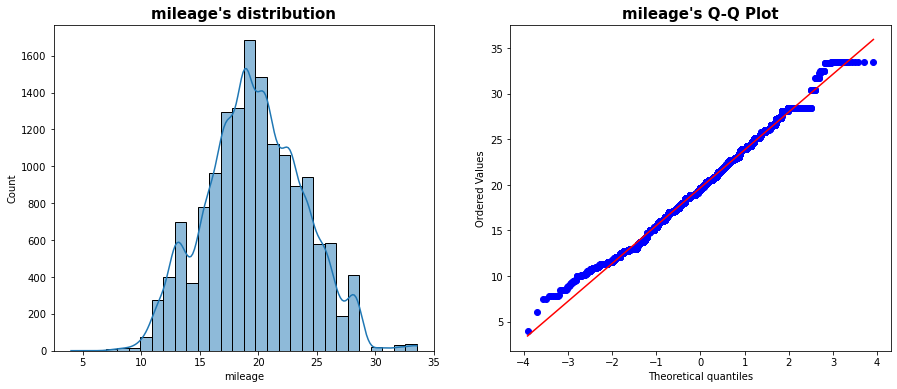

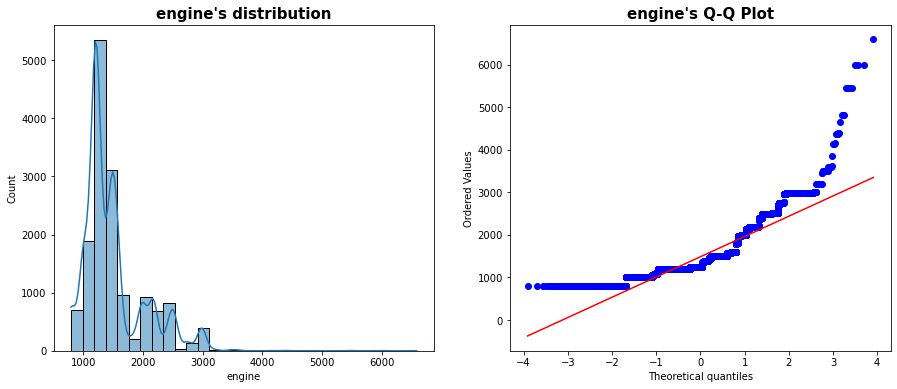

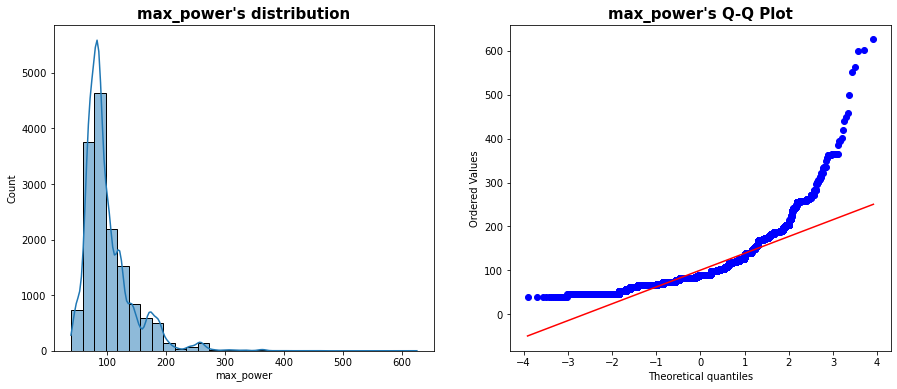

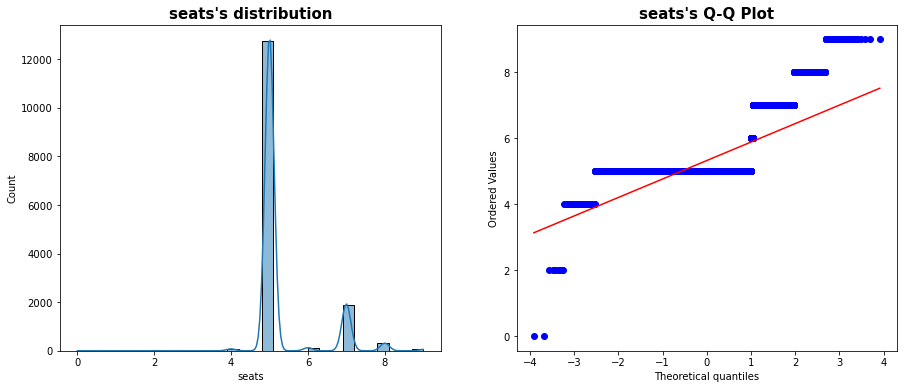

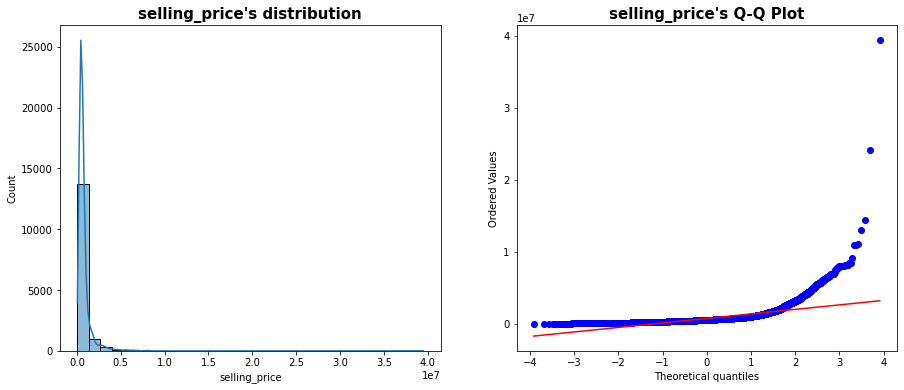

In [67]:
### Checking distribution of numerical features

for feature in numerical_features:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=dataset, x=feature, kde=True, bins=30)
    plt.title("{}'s distribution".format(feature),fontweight="bold", fontsize=15)
    
    plt.subplot(122)
    stats.probplot(dataset[feature], dist='norm', plot=plt)
    plt.title("{}'s Q-Q Plot".format(feature),fontweight="bold", fontsize=15)
    plt.show();

### <span style='color:blue'>Observation</span>

1. Vehicle age, Km Driven, Engine, max_power and selling price have right skewed distribution.
2. Mileage has close to normal distribution just a little bit right skewness is present.
3. Seat is a discreate feature.

### <span style='color:red '>3.16 Outliers in Numerical Features</span>

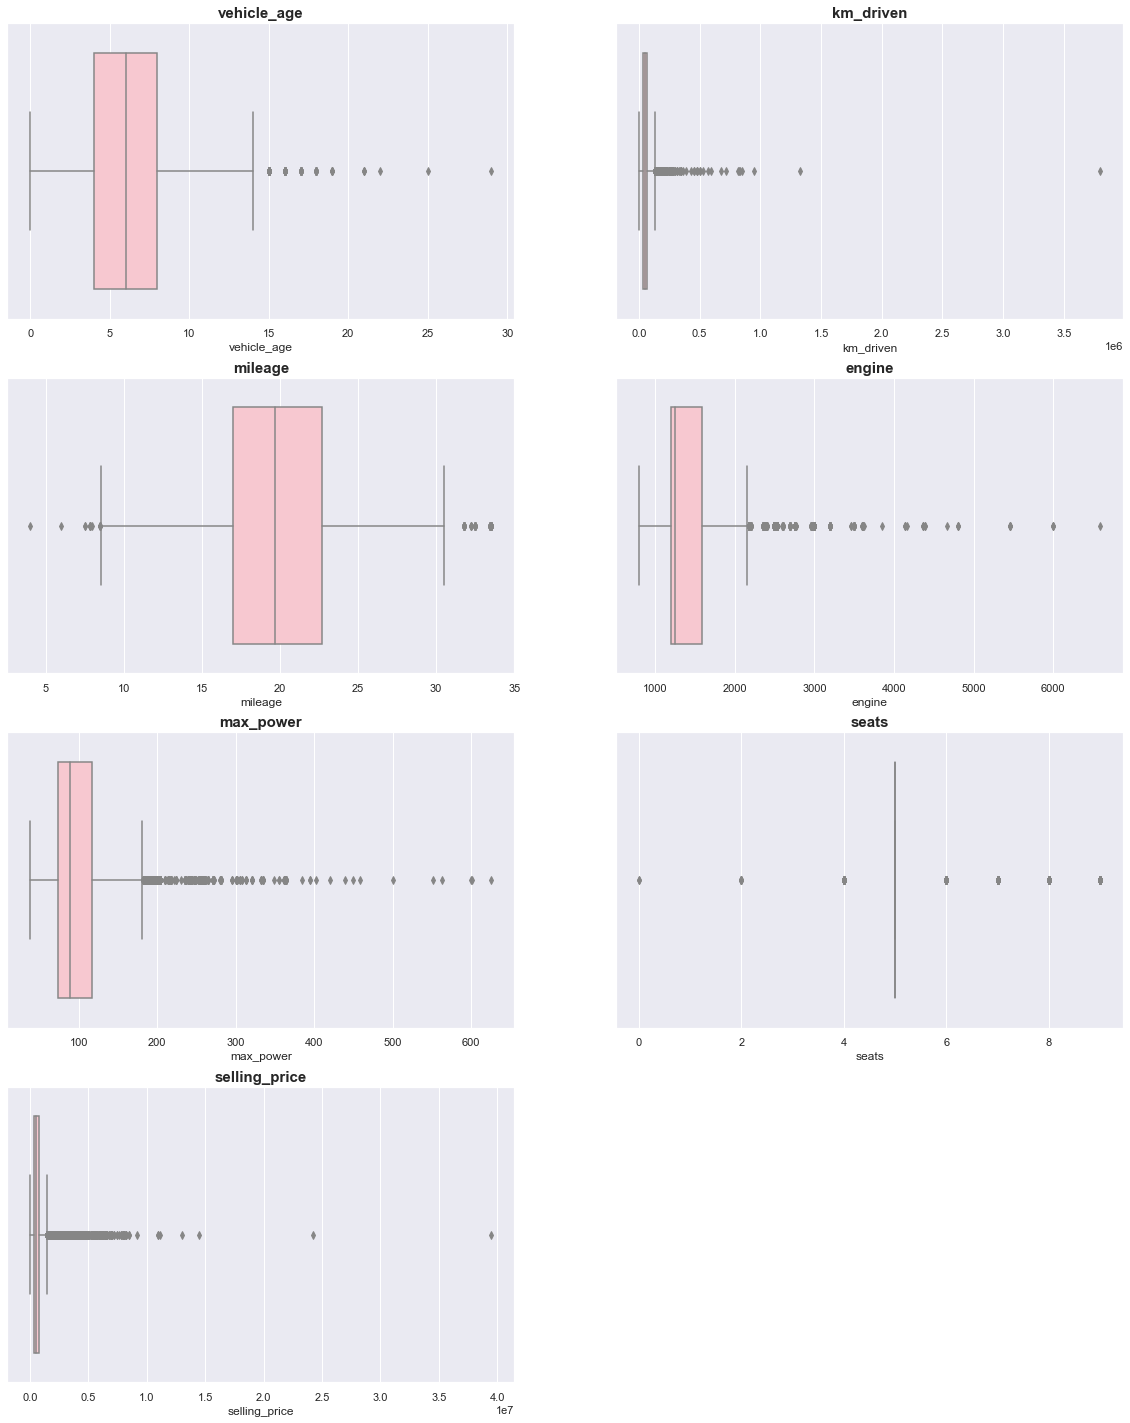

In [69]:
### Checking outliers in numerical features

plt.figure(figsize=(20,25))
for feature in enumerate(numerical_features):
    plt.subplot(4, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

### <span style='color:blue'>Observation</span>

1. Km driven, Max Power and Selling price has large no. of outliers on upper limit side.
2. Vehicle age and engine have less outliers as compared to above features.
3. Mileage has outliers on both sides.

### <span style='color:red '>3.17 Regplot for Numerical features vs Dependent feature</span>

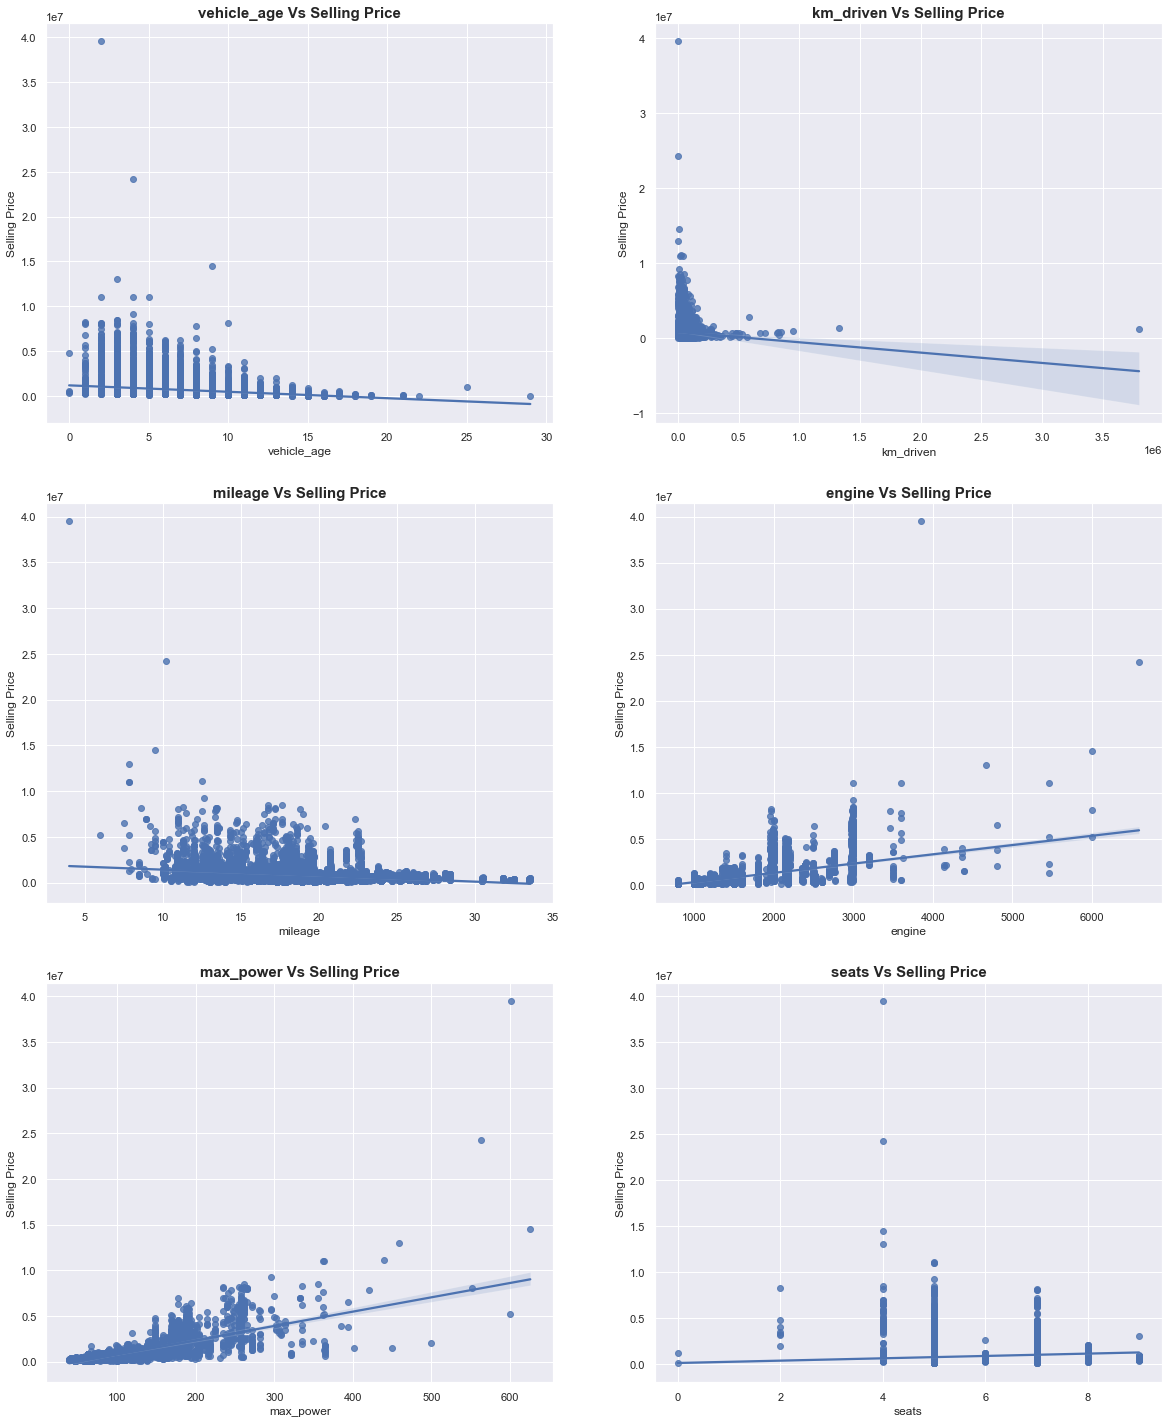

In [49]:
### plotting regplot for features vs dependent feature
plt.figure(figsize=(20,25))
for feature in enumerate([feature for feature in numerical_features if feature not in ['selling_price']]):
    plt.subplot(3, 2, feature[0]+1)
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(data=dataset, x=feature[1], y='selling_price')
    plt.xlabel(feature[1])
    plt.ylabel("Selling Price")
    plt.title("{} Vs Selling Price".format(feature[1]), fontweight='bold', fontsize=15)

### <span style='color:red '>3.18 Correlation between Numerical Features and Dependent Feature</span>

In [72]:
corr=round(dataset[numerical_features].corr(),2)
corr

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.00,0.33,-0.26,0.10,0.00,0.03,-0.24
km_driven,0.33,1.00,-0.10,0.19,0.04,0.19,-0.08
mileage,-0.26,-0.10,1.00,-0.63,-0.53,-0.44,-0.31
engine,0.10,0.19,-0.63,1.00,0.81,0.55,0.59
max_power,0.00,0.04,-0.53,0.81,1.00,0.17,0.75
seats,0.03,0.19,-0.44,0.55,0.17,1.00,0.12
selling_price,-0.24,-0.08,-0.31,0.59,0.75,0.12,1.00


<AxesSubplot:>

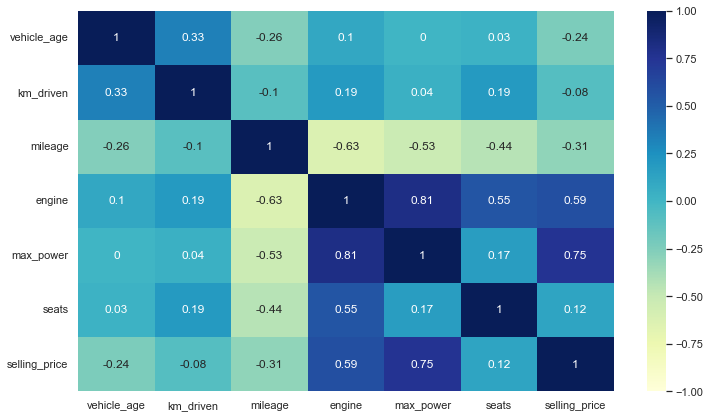

In [75]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data=corr, annot=True,  vmin=-1, vmax=1, cmap="YlGnBu")

### <span style='color:blue'>Observation</span>

1. Selling Price has negative correlation with vehicle age, Km driven, and Mileage.
2. Engine and Max power have moderate correlation with Selling Price.
3. Max Power and engine have high correlation.
4. Km Driven, Vehicle age and Seats have very less correlation with selling price.